In [1]:
#importing required libraries
import bs4
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import re
from collections import OrderedDict
import urllib.parse

In [2]:
locations = ['California, United States', 
             'Seattle, WA, United States']

categories = ['software-development',
              'data-science', 
              'machine-learning-science']

In [9]:
def amazon_job_search(number_page=10,
                      category_filter='software-development',
                      location_filter='Seattle, WA, United States'):
    """
    retrieve job title, job location, job posting date, and job link from every page in 
    https://amazon.jobs.

    Arguments:
    number_page -- Number of pages that one wish to retrive the data from.

    Return:
    s -- A tuple including all the job infromation for each job in each page
    """
    job_title=[]
    location=[]
    posting_date=[]
    job_link=[]
    
    i = 0
    location_filter = urllib.parse.quote(location_filter)
    while True:
        try:
            if number_page is not None and i==number_page:
                break

            driver_path = "chromedriver"
            chrome_options = Options()
            chrome_options.add_argument("--headless")
            driver=webdriver.Chrome(executable_path=driver_path, 
                                    options=chrome_options)

            #There are 10 job postings in each page. Therefore, job pages URL can be updated
            #by muliplying the counter ("i") by 10.

            #URL='https://www.amazon.jobs/en/search?offset='+str(10*i)+'&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=&base_query=&city=&country=&region=&county=&query_options=&'
            URL='https://www.amazon.jobs/en-gb/search?offset=' + str(10 * i) + '&result_limit=10&sort=recent&category=' + category_filter + '&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=' + location_filter + '&base_query=&city=&country=&region=&county=&query_options=&'

            driver.get(URL)
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            driver.quit()

            dates = [re.sub('Posted ', '', td.text) for td in soup.findAll("h2", {"class": "posting-date"})]
            if dates[0][-4:] != '2019':
                break
            else:
                print("Fetching jobs posted on", dates[0], ":", URL.split('&base_query=')[0])

            job_title.append([td.find('h3').text for td in soup.findAll("div", {"class": "job-tile"})])
            location.append([p.text.split(' | ', 1)[0] for p in soup.findAll("p", {"class": "location-and-id"})]) 
            posting_date.append(dates)
            job_link.append(['https://www.amazon.jobs'+td.find('a').get('href') for td in soup.findAll("div", {"class": "job-tile"})])   
            i = i + 1
        except Exception as e:
            pass

    return job_title,location,posting_date,job_link

In [10]:
# driver_path = "chromedriver"
# driver=webdriver.Chrome(executable_path=driver_path)

# i = 0
# URL='https://www.amazon.jobs/en/search?offset='+str(10*i)+'&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=&base_query=&city=&country=&region=&county=&query_options=&'
# driver.get(URL)
# soup = BeautifulSoup(driver.page_source, 'html.parser')
# driver.quit()

In [11]:
#extracting jobs information. Currently there are 346 pages in amazon.job. 
seattle_sde_jobs = amazon_job_search(number_page=None,
                                     category_filter="software-development",
                                     location_filter="Seattle, WA, United States")

Fetching jobs posted on June 25, 2019 : https://www.amazon.jobs/en-gb/search?offset=0&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June 25, 2019 : https://www.amazon.jobs/en-gb/search?offset=10&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June 25, 2019 : https://www.amazon.jobs/en-gb/search?offset=20&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June 25, 2019 : https://www.amazon.jobs/en-gb/search?offset=30&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C

Fetching jobs posted on June 17, 2019 : https://www.amazon.jobs/en-gb/search?offset=330&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June 17, 2019 : https://www.amazon.jobs/en-gb/search?offset=340&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June 17, 2019 : https://www.amazon.jobs/en-gb/search?offset=350&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June 17, 2019 : https://www.amazon.jobs/en-gb/search?offset=360&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20

Fetching jobs posted on June 11, 2019 : https://www.amazon.jobs/en-gb/search?offset=660&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June 11, 2019 : https://www.amazon.jobs/en-gb/search?offset=670&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June 10, 2019 : https://www.amazon.jobs/en-gb/search?offset=680&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June 10, 2019 : https://www.amazon.jobs/en-gb/search?offset=690&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20

Fetching jobs posted on June  3, 2019 : https://www.amazon.jobs/en-gb/search?offset=990&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June  3, 2019 : https://www.amazon.jobs/en-gb/search?offset=1000&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June  3, 2019 : https://www.amazon.jobs/en-gb/search?offset=1010&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June  3, 2019 : https://www.amazon.jobs/en-gb/search?offset=1020&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C

Fetching jobs posted on May 28, 2019 : https://www.amazon.jobs/en-gb/search?offset=1310&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on May 28, 2019 : https://www.amazon.jobs/en-gb/search?offset=1320&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on May 27, 2019 : https://www.amazon.jobs/en-gb/search?offset=1330&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on May 25, 2019 : https://www.amazon.jobs/en-gb/search?offset=1340&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20

Fetching jobs posted on May 20, 2019 : https://www.amazon.jobs/en-gb/search?offset=1640&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on May 20, 2019 : https://www.amazon.jobs/en-gb/search?offset=1650&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on May 20, 2019 : https://www.amazon.jobs/en-gb/search?offset=1660&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on May 20, 2019 : https://www.amazon.jobs/en-gb/search?offset=1670&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20

Fetching jobs posted on May 14, 2019 : https://www.amazon.jobs/en-gb/search?offset=1970&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on May 13, 2019 : https://www.amazon.jobs/en-gb/search?offset=1980&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on May 13, 2019 : https://www.amazon.jobs/en-gb/search?offset=1990&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on May 13, 2019 : https://www.amazon.jobs/en-gb/search?offset=2000&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20

Fetching jobs posted on May  7, 2019 : https://www.amazon.jobs/en-gb/search?offset=2300&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on May  6, 2019 : https://www.amazon.jobs/en-gb/search?offset=2310&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on May  6, 2019 : https://www.amazon.jobs/en-gb/search?offset=2320&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on May  6, 2019 : https://www.amazon.jobs/en-gb/search?offset=2330&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20

Fetching jobs posted on April 29, 2019 : https://www.amazon.jobs/en-gb/search?offset=2620&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on April 29, 2019 : https://www.amazon.jobs/en-gb/search?offset=2630&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on April 29, 2019 : https://www.amazon.jobs/en-gb/search?offset=2640&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on April 26, 2019 : https://www.amazon.jobs/en-gb/search?offset=2650&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seatt

Fetching jobs posted on April 22, 2019 : https://www.amazon.jobs/en-gb/search?offset=2940&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on April 21, 2019 : https://www.amazon.jobs/en-gb/search?offset=2950&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on April 19, 2019 : https://www.amazon.jobs/en-gb/search?offset=2960&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on April 19, 2019 : https://www.amazon.jobs/en-gb/search?offset=2970&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seatt

Fetching jobs posted on April 12, 2019 : https://www.amazon.jobs/en-gb/search?offset=3260&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on April 12, 2019 : https://www.amazon.jobs/en-gb/search?offset=3270&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on April 11, 2019 : https://www.amazon.jobs/en-gb/search?offset=3280&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on April 11, 2019 : https://www.amazon.jobs/en-gb/search?offset=3290&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seatt

Fetching jobs posted on April  4, 2019 : https://www.amazon.jobs/en-gb/search?offset=3580&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on April  4, 2019 : https://www.amazon.jobs/en-gb/search?offset=3590&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on April  3, 2019 : https://www.amazon.jobs/en-gb/search?offset=3600&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on April  3, 2019 : https://www.amazon.jobs/en-gb/search?offset=3610&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seatt

Fetching jobs posted on March 28, 2019 : https://www.amazon.jobs/en-gb/search?offset=3900&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on March 27, 2019 : https://www.amazon.jobs/en-gb/search?offset=3910&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on March 27, 2019 : https://www.amazon.jobs/en-gb/search?offset=3920&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on March 27, 2019 : https://www.amazon.jobs/en-gb/search?offset=3930&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seatt

Fetching jobs posted on March 20, 2019 : https://www.amazon.jobs/en-gb/search?offset=4220&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on March 20, 2019 : https://www.amazon.jobs/en-gb/search?offset=4230&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on March 20, 2019 : https://www.amazon.jobs/en-gb/search?offset=4240&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on March 20, 2019 : https://www.amazon.jobs/en-gb/search?offset=4250&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seatt

Fetching jobs posted on March 13, 2019 : https://www.amazon.jobs/en-gb/search?offset=4540&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on March 13, 2019 : https://www.amazon.jobs/en-gb/search?offset=4550&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on March 13, 2019 : https://www.amazon.jobs/en-gb/search?offset=4560&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on March 12, 2019 : https://www.amazon.jobs/en-gb/search?offset=4570&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seatt

Fetching jobs posted on March  7, 2019 : https://www.amazon.jobs/en-gb/search?offset=4860&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on March  7, 2019 : https://www.amazon.jobs/en-gb/search?offset=4870&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on March  7, 2019 : https://www.amazon.jobs/en-gb/search?offset=4880&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on March  7, 2019 : https://www.amazon.jobs/en-gb/search?offset=4890&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seatt

Fetching jobs posted on February 27, 2019 : https://www.amazon.jobs/en-gb/search?offset=5180&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on February 27, 2019 : https://www.amazon.jobs/en-gb/search?offset=5190&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on February 27, 2019 : https://www.amazon.jobs/en-gb/search?offset=5200&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on February 27, 2019 : https://www.amazon.jobs/en-gb/search?offset=5210&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc

Fetching jobs posted on February 20, 2019 : https://www.amazon.jobs/en-gb/search?offset=5500&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on February 20, 2019 : https://www.amazon.jobs/en-gb/search?offset=5510&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on February 19, 2019 : https://www.amazon.jobs/en-gb/search?offset=5520&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on February 19, 2019 : https://www.amazon.jobs/en-gb/search?offset=5530&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc

Fetching jobs posted on February 12, 2019 : https://www.amazon.jobs/en-gb/search?offset=5820&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on February 11, 2019 : https://www.amazon.jobs/en-gb/search?offset=5830&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on February 11, 2019 : https://www.amazon.jobs/en-gb/search?offset=5840&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on February 11, 2019 : https://www.amazon.jobs/en-gb/search?offset=5850&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc

Fetching jobs posted on February  1, 2019 : https://www.amazon.jobs/en-gb/search?offset=6140&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on February  1, 2019 : https://www.amazon.jobs/en-gb/search?offset=6150&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on February  1, 2019 : https://www.amazon.jobs/en-gb/search?offset=6160&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on February  1, 2019 : https://www.amazon.jobs/en-gb/search?offset=6170&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc

Fetching jobs posted on January 24, 2019 : https://www.amazon.jobs/en-gb/search?offset=6460&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on January 24, 2019 : https://www.amazon.jobs/en-gb/search?offset=6470&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on January 23, 2019 : https://www.amazon.jobs/en-gb/search?offset=6480&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on January 23, 2019 : https://www.amazon.jobs/en-gb/search?offset=6490&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_que

Fetching jobs posted on January 14, 2019 : https://www.amazon.jobs/en-gb/search?offset=6780&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on January 14, 2019 : https://www.amazon.jobs/en-gb/search?offset=6790&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on January 14, 2019 : https://www.amazon.jobs/en-gb/search?offset=6800&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on January 13, 2019 : https://www.amazon.jobs/en-gb/search?offset=6810&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_que

Fetching jobs posted on January  3, 2019 : https://www.amazon.jobs/en-gb/search?offset=7100&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on January  3, 2019 : https://www.amazon.jobs/en-gb/search?offset=7110&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on January  3, 2019 : https://www.amazon.jobs/en-gb/search?offset=7120&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on January  2, 2019 : https://www.amazon.jobs/en-gb/search?offset=7130&result_limit=10&sort=recent&category=software-development&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_que

In [12]:
def make_list(job):
    """
    put all the job data in alist that can be used to create a DataFrame

    Arguments:
    job_list -- A tuple containing job title, job location, job posting date, and job link .

    Return:
    s -- A list containing job information
    """
    t=[]
    for i in job:
        for b in i:
            for c in b:
                t.append(c)
    return t

In [15]:
#make a list of all job data
job_list=make_list(seattle_sde_jobs)
len(job_list)

28640

In [16]:
#Create a dataframe from the job information list
def make_dataframe(job_list):
    """
    ceate a dataframe from the job_list
    
    Arguments:
    job_list -- A tuple containing job title, job location, job posting date, and job link .

    Return:
    df -- A dataframe containing each job description, basic qualification and preferred qualification.
    """
    
    l=int(len(job_list)/4)
    df=pd.DataFrame(OrderedDict({'Title': job_list[:l],
                                 'location': job_list[l:2*l],
                                 'Posting_date':job_list[2*l:3*l], 
                                 'job_link': job_list[3*l:]}) )
    
    return df

In [17]:
#DataFrame containing job title, job location, job posting date, and job link.
df1=make_dataframe(job_list)

In [18]:
df1.tail()

,Title,location,Posting_date,job_link
7155,Software Development Engineer,"UK, London","January 2, 2019",https://www.amazon.jobs/en-gb/jobs/770153/soft...
7156,Software Development Engineer - Prime Video,"US, WA, Seattle","January 2, 2019",https://www.amazon.jobs/en-gb/jobs/770140/soft...
7157,Software Development Engineer,"US, WA, Seattle","January 1, 2019",https://www.amazon.jobs/en-gb/jobs/770092/soft...
7158,Softwre Integration Engineer,"CN, Beijing","January 1, 2019",https://www.amazon.jobs/en-gb/jobs/770081/soft...
7159,"Software Developement Manager, Alexa Shopping","IL, Haifa","January 1, 2019",https://www.amazon.jobs/en-gb/jobs/770073/soft...


In [19]:
df1.shape

(7160, 4)

In [23]:
df1.to_csv('amazon_sde_2019_jobs.csv')

In [62]:
l=int(len(job_list)/4)
URL = job_list[3*l:][0]

In [63]:
print(URL)

https://www.amazon.jobs/en-gb/jobs/885083/software-development-engineer-amazon-alexa-cloud-services


In [64]:
driver_path = "chromedriver"
driver=webdriver.Chrome(executable_path=driver_path)
driver.get(URL)
soup = BeautifulSoup(driver.page_source, 'html.parser')
driver.quit()

In [70]:
required_info = ['DESCRIPTION', 
                 'BASIC QUALIFICATIONS',
                 'PREFERRED QUALIFICATIONS']
            
for h3 in soup.findAll("h3"):
    print(h3.text)
    if h3.text in required_info:
        print(h3.next_sibling.text)

DESCRIPTION

Want to teach Alexa new ways to help customers manage their tasks? Ask Alexa for your to-do list, or add an item to your shopping list; that’s us.Our team is responsible for building the always helpful, contextually aware assistant that helps customers manage their tasks. Our mission is to go beyond being a memory aid to become a trusted partner for getting stuff done. We also own the Alexa List API that third party developers use to integrate their productivity apps with Alexa.We are looking for a passionate engineer to join our team and drive the development of cloud that powers Alexa. You will have a great opportunity to make a large impact on the design and architecture of cutting edge products used every day, by people you know.The Role:· Work in an Agile/Scrum environment to deliver high quality software against aggressive schedules· Establish design principles, select design patterns and mentor junior team members· Help to define and push for the best possible end-u

In [82]:
soup.find('div', {"class":"team-icon"}).find('div', {'class':'association-content'}).text.strip()

'Alexa Household Organisation'

In [114]:
# [h3.next_sibling for h3 in soup.findAll("h3")][0].text

'Want to teach Alexa new ways to help customers manage their tasks? Ask Alexa for your to-do list, or add an item to your shopping list; that’s us.Our team is responsible for building the always helpful, contextually aware assistant that helps customers manage their tasks. Our mission is to go beyond being a memory aid to become a trusted partner for getting stuff done. We also own the Alexa List API that third party developers use to integrate their productivity apps with Alexa.We are looking for a passionate engineer to join our team and drive the development of cloud that powers Alexa. You will have a great opportunity to make a large impact on the design and architecture of cutting edge products used every day, by people you know.The Role:· Work in an Agile/Scrum environment to deliver high quality software against aggressive schedules· Establish design principles, select design patterns and mentor junior team members· Help to define and push for the best possible end-user experien

In [ ]:
from tqdm import tqdm_notebook as tqdm

def job_description(job_list=None,
                    job_df=None):
    """
    retrieving job description, basic qualification and preferred qualification.
    we get the job link from the previous job_list and then this function goes to every posted job
    page to get each job description, basic qualification and preferred qualification.

    Arguments:
    job_list -- A tuple containing job title, job location, job posting date, and job link.
    job_df -- A dataframe with Title, location, Posting date and job_link
        Either one of the args is sufficient.

    Return:
    job_information -- A list containing each job description, basic qualification and preferred qualification.
    """
    job_information=[]
    
    if job_list is not None:
        l=int(len(job_list)/4)
        job_links=job_list[3*l:]
        
    elif job_df is not None:
        job_links = job_df.job_link.values.tolist()

    for job_link in tqdm(job_links):
        try:
            driver_path = "chromedriver"
            chrome_options = Options()
            chrome_options.add_argument("--headless")
            driver=webdriver.Chrome(executable_path=driver_path, 
                                    options=chrome_options)
            URL= job_link #job_link[x]
            driver.get(URL)
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            driver.quit()
            print(x, "Fetching job information from", URL)

            required_info = ['DESCRIPTION', 
                             'BASIC QUALIFICATIONS',
                             'PREFERRED QUALIFICATIONS']
            job_info = []
            for h3 in soup.findAll("h3"):
                if h3.text in required_info:
                    job_info.append(h3.next_sibling.text)
                    
            team = soup.find('div',
                             {"class":"team-icon"}).find('div', 
                                                         {'class':'association-content'}).text.strip()
            job_info.append(team)
            job_information.append(job_info)
        except Exception as e:
            pass

    return job_information

In [90]:
june_job_descriptions=[]
job_df=amazon_sde_june
job_list=None

if job_df is not None:
    job_links = job_df.job_link.values.tolist()

for job_link in tqdm(job_links):
    try:
        driver_path = "chromedriver"
        chrome_options = Options()
        chrome_options.add_argument("--headless")
        driver=webdriver.Chrome(executable_path=driver_path, 
                                options=chrome_options)
        URL= job_link #job_link[x]
        driver.get(URL)
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        driver.quit()
        print("Fetching job information from", URL)

        required_info = ['DESCRIPTION', 
                         'BASIC QUALIFICATIONS',
                         'PREFERRED QUALIFICATIONS']
        job_info = []
        for h3 in soup.findAll("h3"):
            if h3.text in required_info:
                job_info.append(h3.next_sibling.text)

        team = soup.find('div',
                         {"class":"team-icon"}).find('div', 
                                                     {'class':'association-content'}).text.strip()
        job_info.append(team)
        june_job_descriptions.append(job_info)
    except Exception as e:
        pass

Fetching job information from https://www.amazon.jobs/en-gb/jobs/885083/software-development-engineer-amazon-alexa-cloud-services
Fetching job information from https://www.amazon.jobs/en-gb/jobs/884960/sr-software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/884827/front-end-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/884758/sdet
Fetching job information from https://www.amazon.jobs/en-gb/jobs/884757/sdet
Fetching job information from https://www.amazon.jobs/en-gb/jobs/884714/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/884633/prime-air-software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/884574/senior-technical-program-manager
Fetching job information from https://www.amazon.jobs/en-gb/jobs/884565/sr-software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/884564/sr-software-development-

Fetching job information from https://www.amazon.jobs/en-gb/jobs/881922/sr-manager-software-development-redshift
Fetching job information from https://www.amazon.jobs/en-gb/jobs/881920/software-development-manager
Fetching job information from https://www.amazon.jobs/en-gb/jobs/881919/front-end-software-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/881918/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/881917/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/881901/frontend-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/881859/2019-fall-software-development-engineer-intern
Fetching job information from https://www.amazon.jobs/en-gb/jobs/881858/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/881811/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/8818

Fetching job information from https://www.amazon.jobs/en-gb/jobs/879648/software-development-engineer-alexa-speech
Fetching job information from https://www.amazon.jobs/en-gb/jobs/879572/software-development-manager-shopping-automatic-speech-recognition
Fetching job information from https://www.amazon.jobs/en-gb/jobs/879552/partner-solution-architect
Fetching job information from https://www.amazon.jobs/en-gb/jobs/879540/partner-solution-architect
Fetching job information from https://www.amazon.jobs/en-gb/jobs/879473/amazon-web-services-software-developer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/879456/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/879329/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/879309/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/879306/software-development-manager
Fetching job information from 

Fetching job information from https://www.amazon.jobs/en-gb/jobs/877575/sr-software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/877561/sr-software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/877541/software-development-engineer-display-advertising-core-services
Fetching job information from https://www.amazon.jobs/en-gb/jobs/877538/software-development-engineer-ii-amz1637
Fetching job information from https://www.amazon.jobs/en-gb/jobs/877524/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/877523/senior-software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/877518/senior-framework-system-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/877502/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/877496/software-development-engineer
Fetching 

Fetching job information from https://www.amazon.jobs/en-gb/jobs/875633/software-development-engineer-alexa-automotive
Fetching job information from https://www.amazon.jobs/en-gb/jobs/875615/software-development-engineer-iii
Fetching job information from https://www.amazon.jobs/en-gb/jobs/875590/devops-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/875588/bsp-software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/875582/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/875581/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/875542/software-development-manager-aws-security
Fetching job information from https://www.amazon.jobs/en-gb/jobs/875539/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/875538/senior-software-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs

Fetching job information from https://www.amazon.jobs/en-gb/jobs/873682/software-development-engineer-aws-aurora
Fetching job information from https://www.amazon.jobs/en-gb/jobs/873660/software-development-engineer-maps-data
Fetching job information from https://www.amazon.jobs/en-gb/jobs/873600/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/873599/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/873591/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/873589/software-development-engineer-prime-video-voice
Fetching job information from https://www.amazon.jobs/en-gb/jobs/873571/software-development-manager-last-mile-technology
Fetching job information from https://www.amazon.jobs/en-gb/jobs/873570/senior-software-development-engineer-amazon-maps-and-navigation
Fetching job information from https://www.amazon.jobs/en-gb/jobs/873569/sde-ii
Fetching job

Fetching job information from https://www.amazon.jobs/en-gb/jobs/871508/senior-software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/871506/software-development-engineer-amazon-robotics-north-reading-ma
Fetching job information from https://www.amazon.jobs/en-gb/jobs/871502/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/871501/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/871498/senior-software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/871494/software-development-engineer-ii
Fetching job information from https://www.amazon.jobs/en-gb/jobs/871467/software-development-engineer-alexa-news
Fetching job information from https://www.amazon.jobs/en-gb/jobs/871461/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/871394/software-development-engineer-i
Fetching job inform

Fetching job information from https://www.amazon.jobs/en-gb/jobs/869729/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/869718/software-development-manager
Fetching job information from https://www.amazon.jobs/en-gb/jobs/869708/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/869702/software-development-engineer-alexa-mobile
Fetching job information from https://www.amazon.jobs/en-gb/jobs/869700/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/869686/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/jobs/869670/software-development-manager
Fetching job information from https://www.amazon.jobs/en-gb/jobs/869581/software-development-engineer-mobile-ii
Fetching job information from https://www.amazon.jobs/en-gb/jobs/869459/software-development-engineer
Fetching job information from https://www.amazon.jobs/en-gb/j

In [ ]:
# june_job_descriptions = job_description(job_df=amazon_sde_june,
#                                         job_list=None)

In [93]:
#create a dataframe from the job description, basic qualification and preferred qualification
df2=pd.DataFrame(june_job_descriptions,
                 columns=['DESCRIPTION','BASIC QUALIFICATIONS','PREFERRED QUALIFICATIONS', 'TEAM'])

In [94]:
df1.head()

,Title,location,Posting_date,job_link,date
0,"Software Development Engineer, Amazon Alexa (C...","US, CA, Sunnyvale","June 25, 2019",https://www.amazon.jobs/en-gb/jobs/885083/soft...,2019-06-25
1,Sr. Software Development Engineer,"US, WA, Seattle","June 25, 2019",https://www.amazon.jobs/en-gb/jobs/884960/sr-s...,2019-06-25
2,Front End Engineer,"US, WA, Seattle","June 25, 2019",https://www.amazon.jobs/en-gb/jobs/884827/fron...,2019-06-25
3,SDET,"US, WA, Seattle","June 25, 2019",https://www.amazon.jobs/en-gb/jobs/884758/sdet,2019-06-25
4,SDET,"US, WA, Seattle","June 25, 2019",https://www.amazon.jobs/en-gb/jobs/884757/sdet,2019-06-25


In [95]:
df1['date'] = pd.to_datetime(df1['Posting_date'])

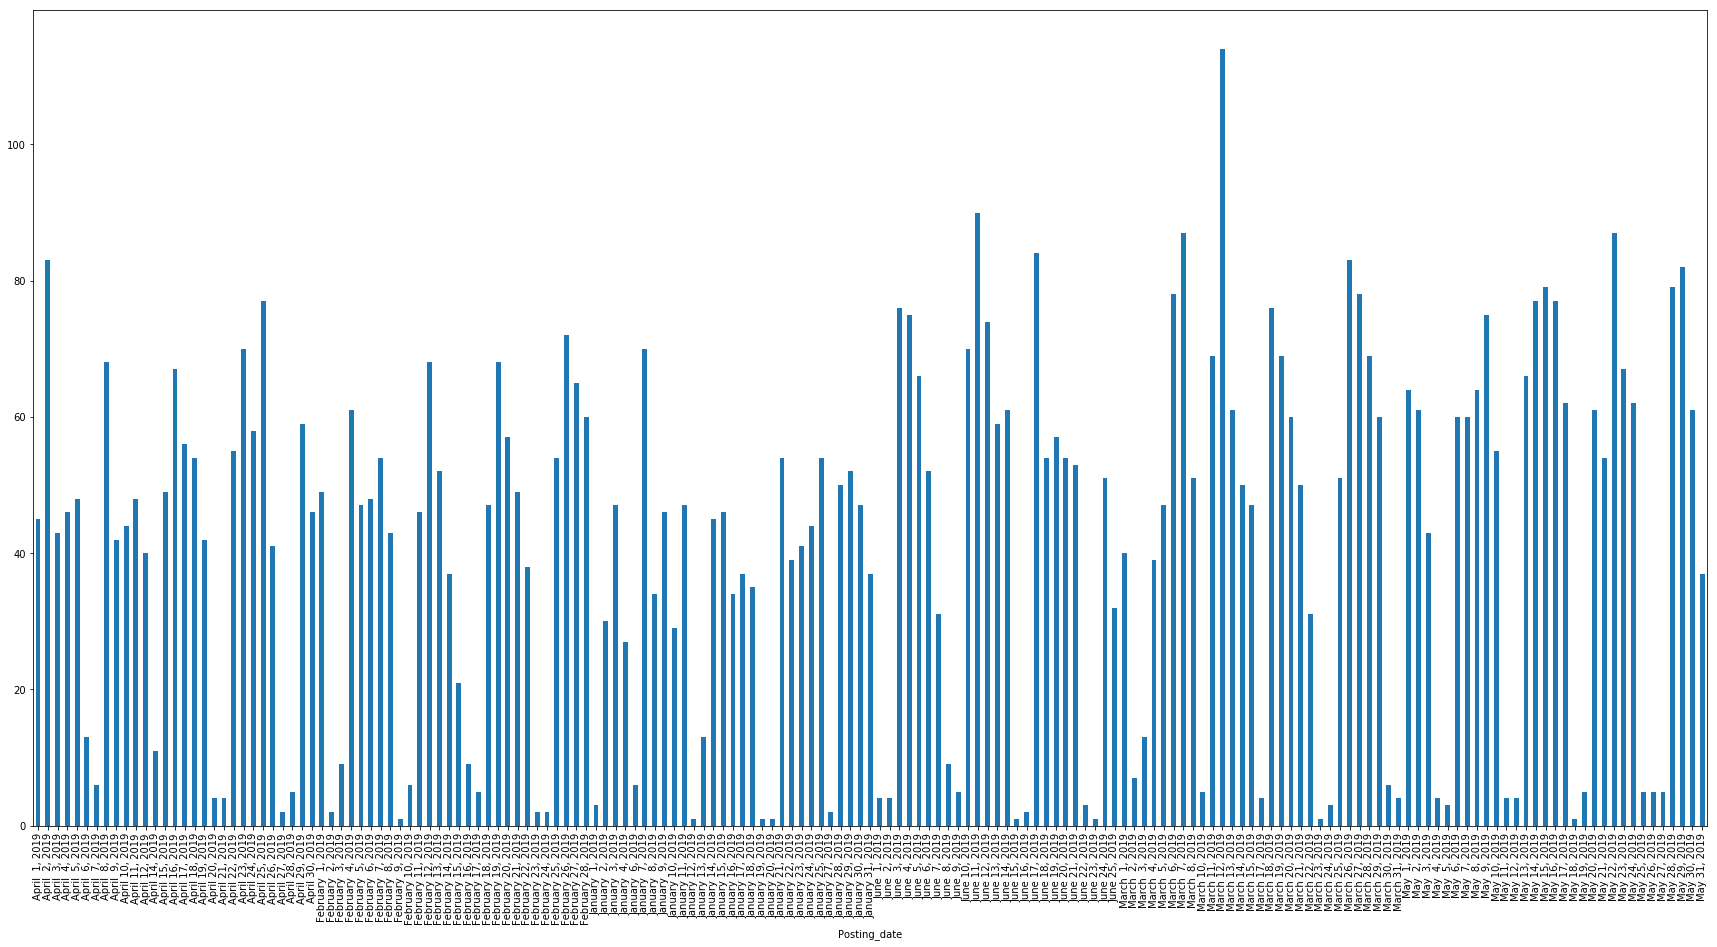

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,15))
df1.groupby('Posting_date').count()['job_link'].plot('bar')

In [97]:
df1.location.unique()

array(['US, CA, Sunnyvale', 'US, WA, Seattle', 'US, NY, New York',
       'US, Virtual', 'US, VA, Herndon', 'US, NJ, Newark',
       'ZA, Cape Town', 'IN, TS, Hyderabad', 'CA, ON', 'US, MA, Boston',
       'US, WA, Bellevue', 'US, CO, Denver', 'US, CA, East Palo Alto',
       'US, CA, Palo Alto', 'CA, BC, Vancouver', 'US, MA, North Reading',
       'US, MA, Cambridge', 'US, CA, Santa Clara', 'AU, NSW, Sydney',
       'IN, KA, Bangalore', 'US, CA, San Francisco',
       'US, CA, Santa Monica', 'US, OR, Portland', 'US, CA, San Jose',
       'US, TX, Austin', 'US, CA, Cupertino', 'DE, Berlin',
       'UK, Edinburgh', 'CN, Beijing', 'UK, London', 'US, CO, Boulder',
       'CA, ON, Toronto', 'RO, Iasi', 'US, CA, Irvine',
       'US, CA, San Diego', 'JO, Amman', 'LU, Luxembourg',
       'IN, TN, Chennai', 'ES, Madrid', 'US, VA, Arlington',
       'IE, DUBLIN, Dublin', 'IL, Tel Aviv', 'US, CA, Santa Cruz',
       'US, MA, Medford', 'IN, HR, Gurgaon', 'UK, Cambridge', 'JP, Tokyo',
       'JP, 

In [98]:
df2.head()

,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS,TEAM
0,Want to teach Alexa new ways to help customers...,· 2+ years of non-internship professional soft...,· Excellent understanding of design for scalab...,Alexa Household Organisation
1,AWS CloudFront is looking for experienced Soft...,· 4+ years of professional software developmen...,· Masters Degree in Computer Science or closel...,Software Development Engineers
2,Are you obsessed with building world class sho...,· · Bachelor’s Degree in Computer Science or...,· Track record delivering front-end software t...,Amazon Fashion
3,"You love software, and you love to write softw...",Bachelor's Degree in Computer Science or relat...,· Master’s degree or Ph.D. in Computer Science...,Software Development Engineers
4,"You love software, and you love to write softw...",Bachelor's Degree in Computer Science or relat...,· Master’s degree or Ph.D. in Computer Science...,Software Development Engineers


In [210]:
df1.head()

,Title,location,Posting_date,job_link,date
0,"Software Development Engineer, Amazon Alexa (C...","US, CA, Sunnyvale","June 25, 2019",https://www.amazon.jobs/en-gb/jobs/885083/soft...,2019-06-25
1,Sr. Software Development Engineer,"US, WA, Seattle","June 25, 2019",https://www.amazon.jobs/en-gb/jobs/884960/sr-s...,2019-06-25
2,Front End Engineer,"US, WA, Seattle","June 25, 2019",https://www.amazon.jobs/en-gb/jobs/884827/fron...,2019-06-25
3,SDET,"US, WA, Seattle","June 25, 2019",https://www.amazon.jobs/en-gb/jobs/884758/sdet,2019-06-25
4,SDET,"US, WA, Seattle","June 25, 2019",https://www.amazon.jobs/en-gb/jobs/884757/sdet,2019-06-25


In [211]:
result = pd.concat([df1[['Title','location','Posting_date', 'job_link', 'date']],
                    df2[['DESCRIPTION','BASIC QUALIFICATIONS','PREFERRED QUALIFICATIONS','TEAM']]],
                   axis=1, join='inner')

In [212]:
result.shape

(911, 9)

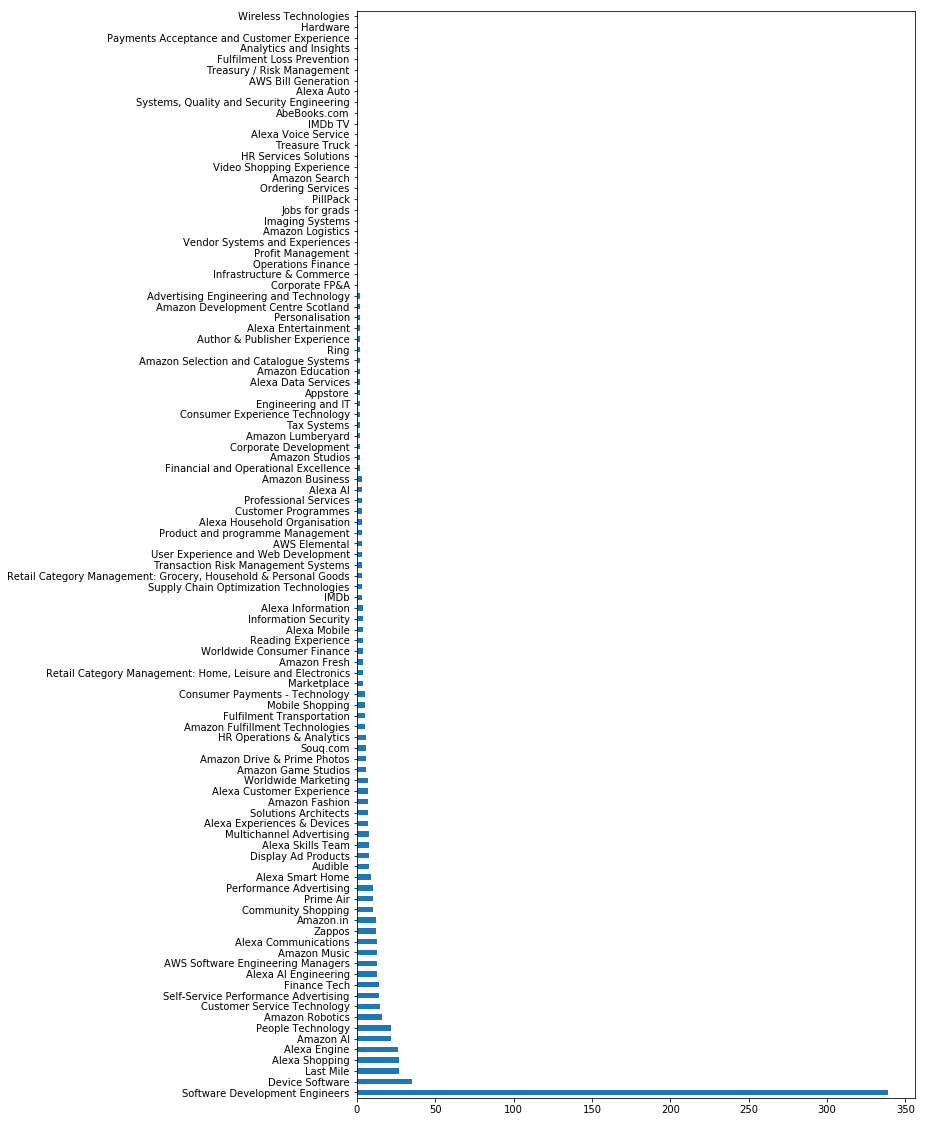

In [213]:
plt.figure(figsize=(10,20))
result[result['Posting_date'].str[:4]=='June']['TEAM'].value_counts().plot('barh')

In [214]:
result.columns

Index(['Title', 'location', 'Posting_date', 'job_link', 'date', 'DESCRIPTION',
       'BASIC QUALIFICATIONS', 'PREFERRED QUALIFICATIONS', 'TEAM'],
      dtype='object')

#### DESCRIPTION

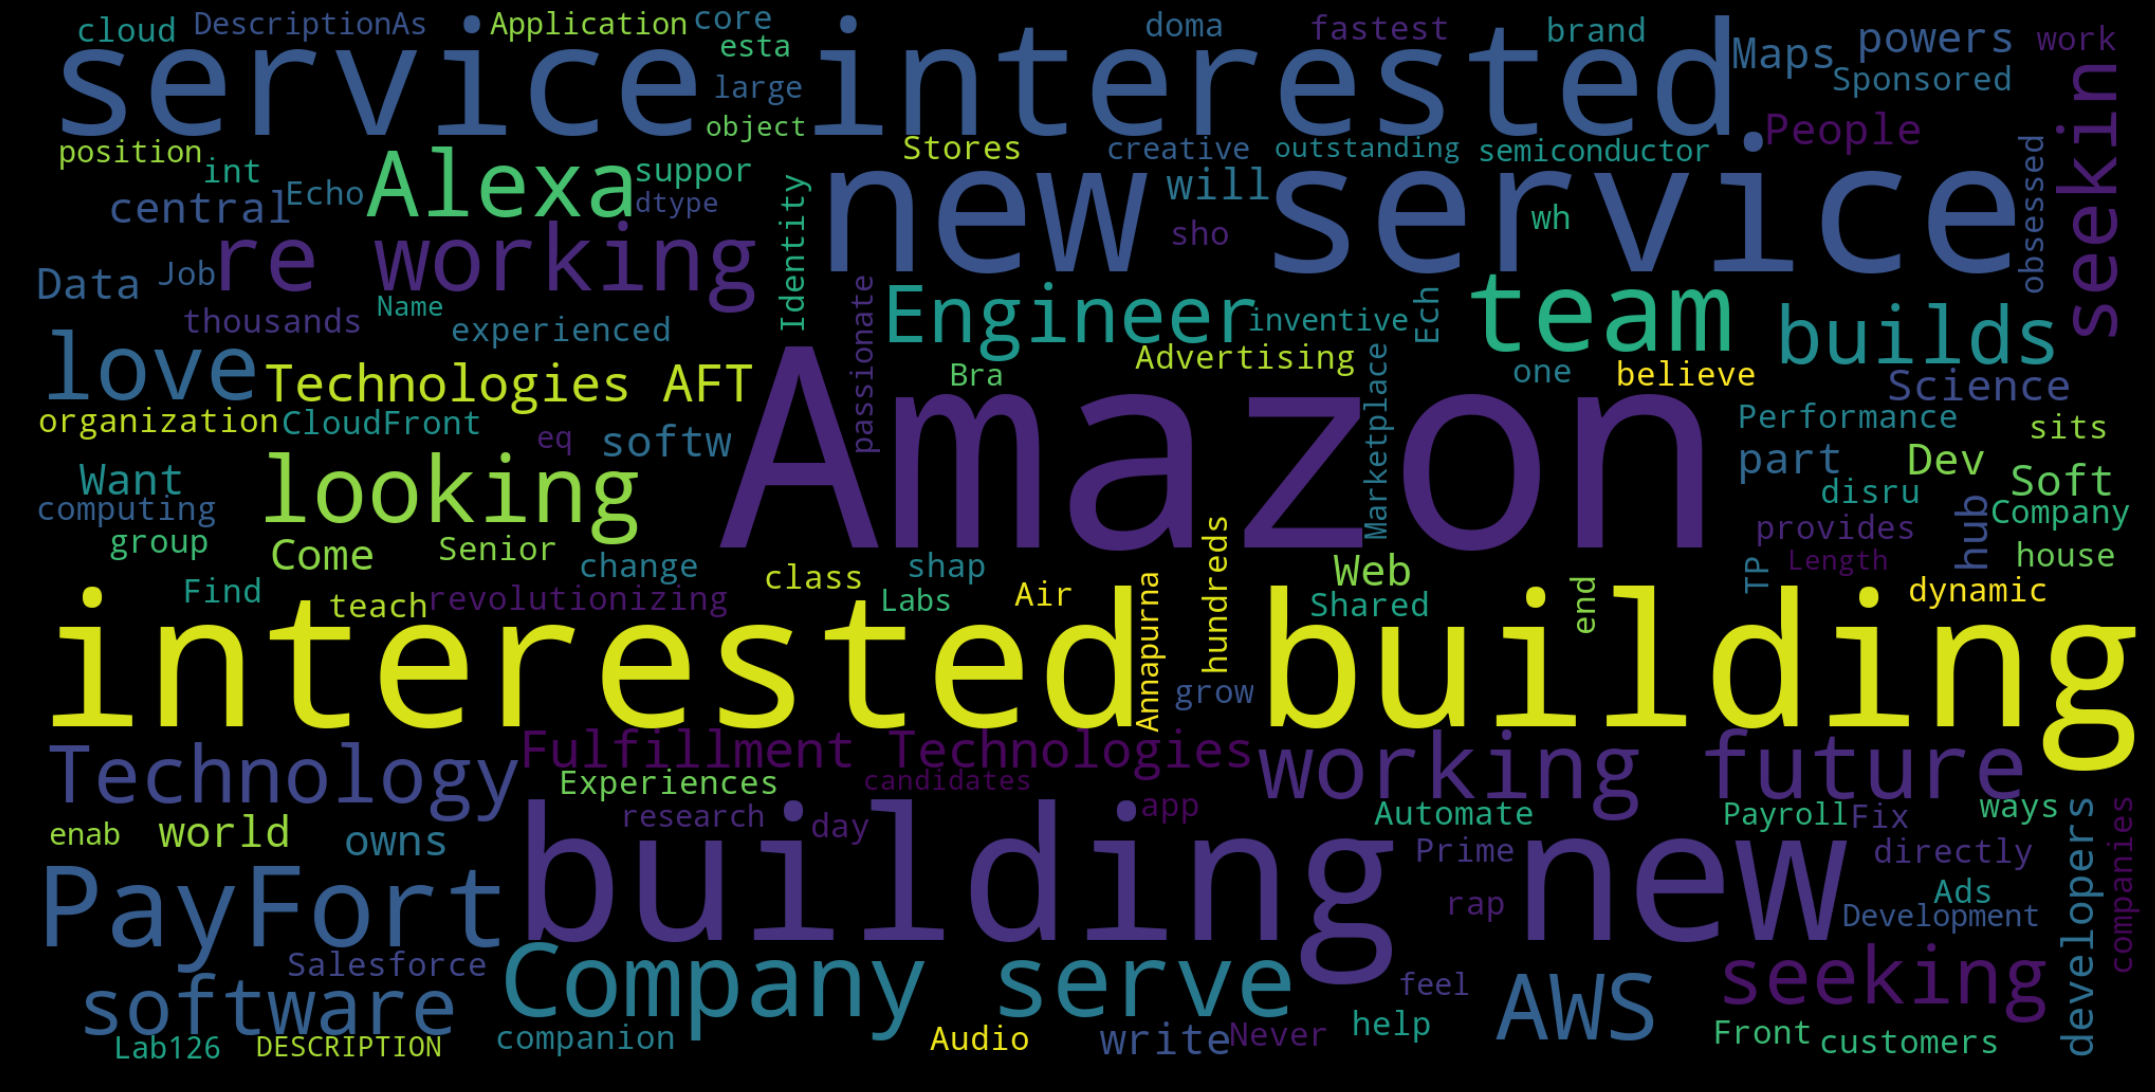

In [124]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(result['DESCRIPTION']))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### BASIC QUALIFICATIONS

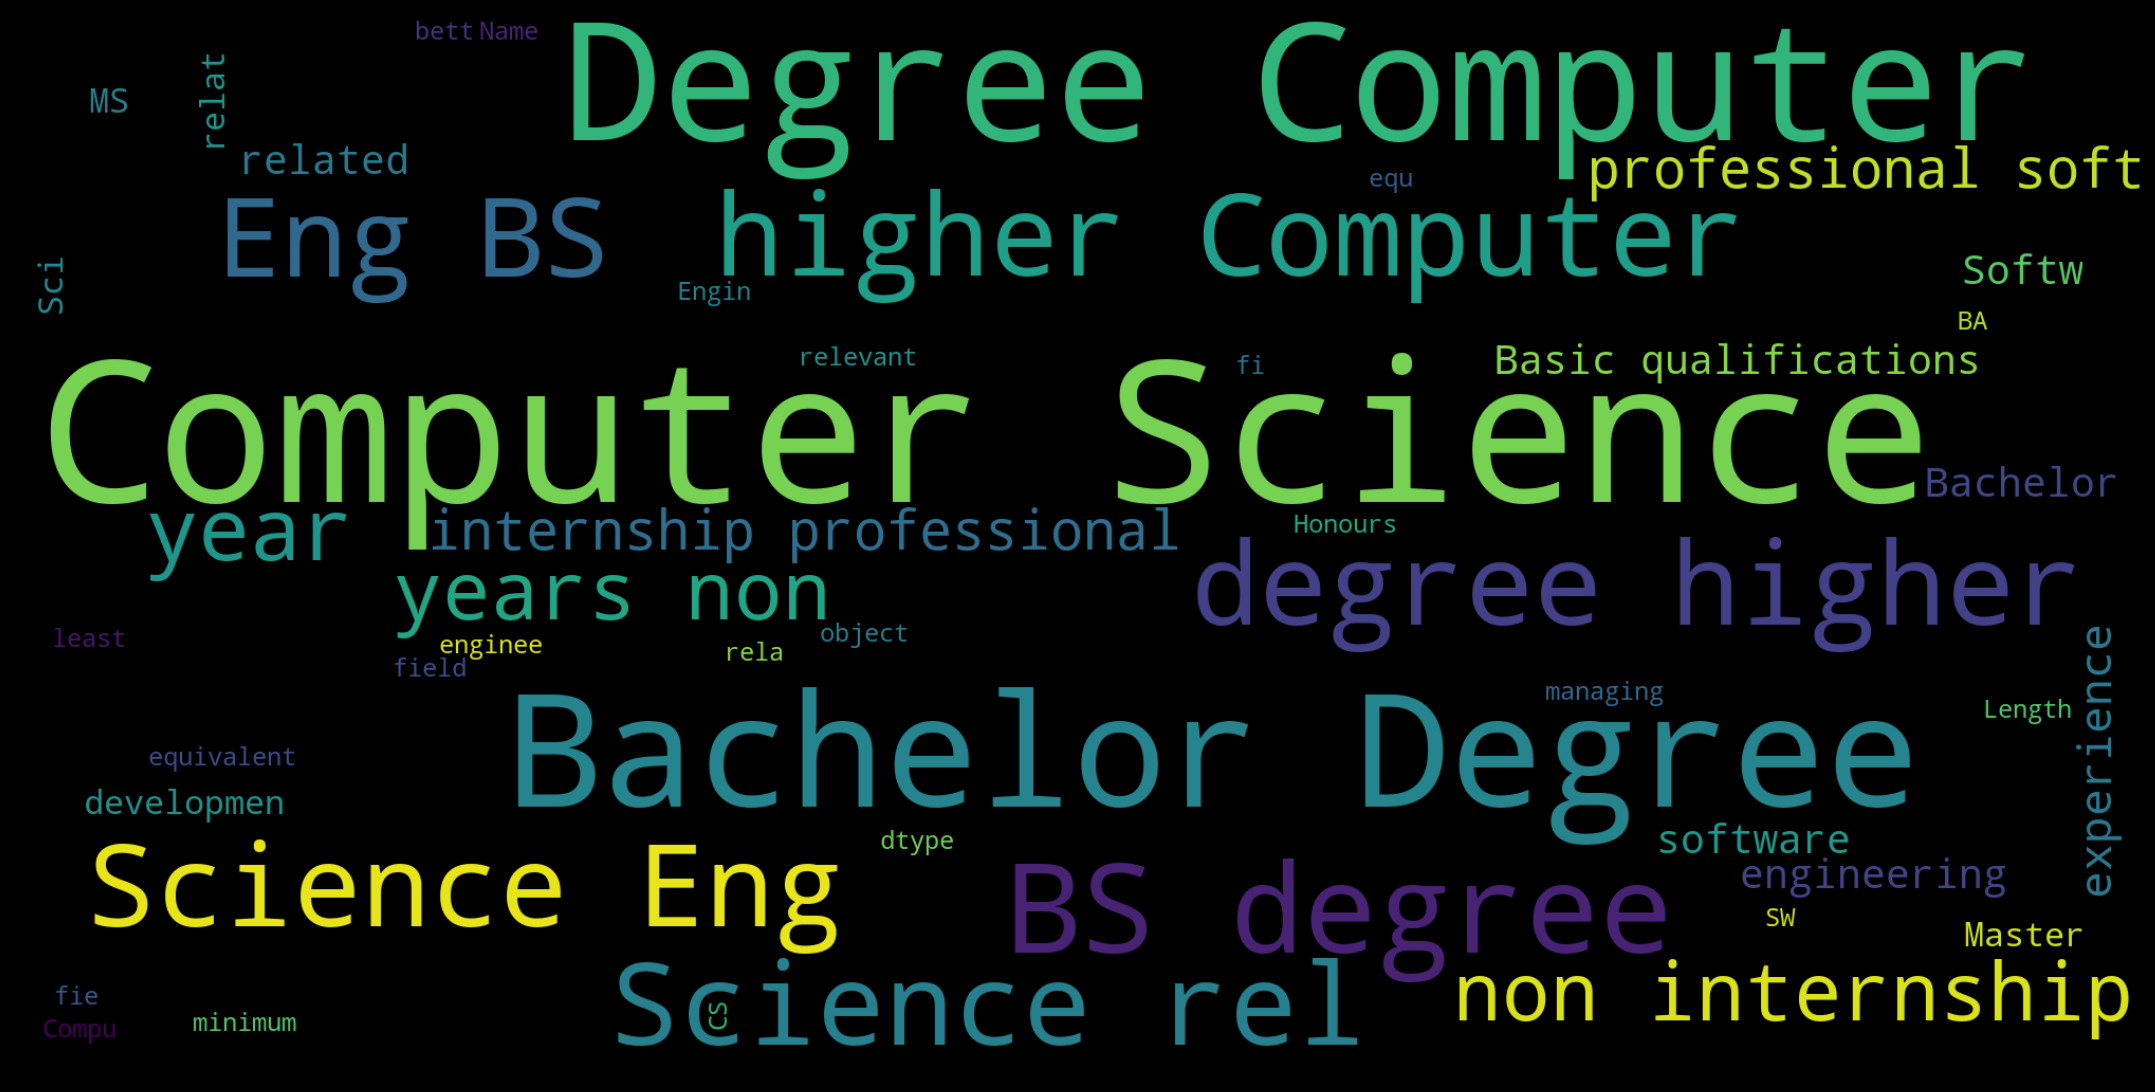

In [125]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(result['BASIC QUALIFICATIONS']))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### PREFERRED QUALIFICATIONS

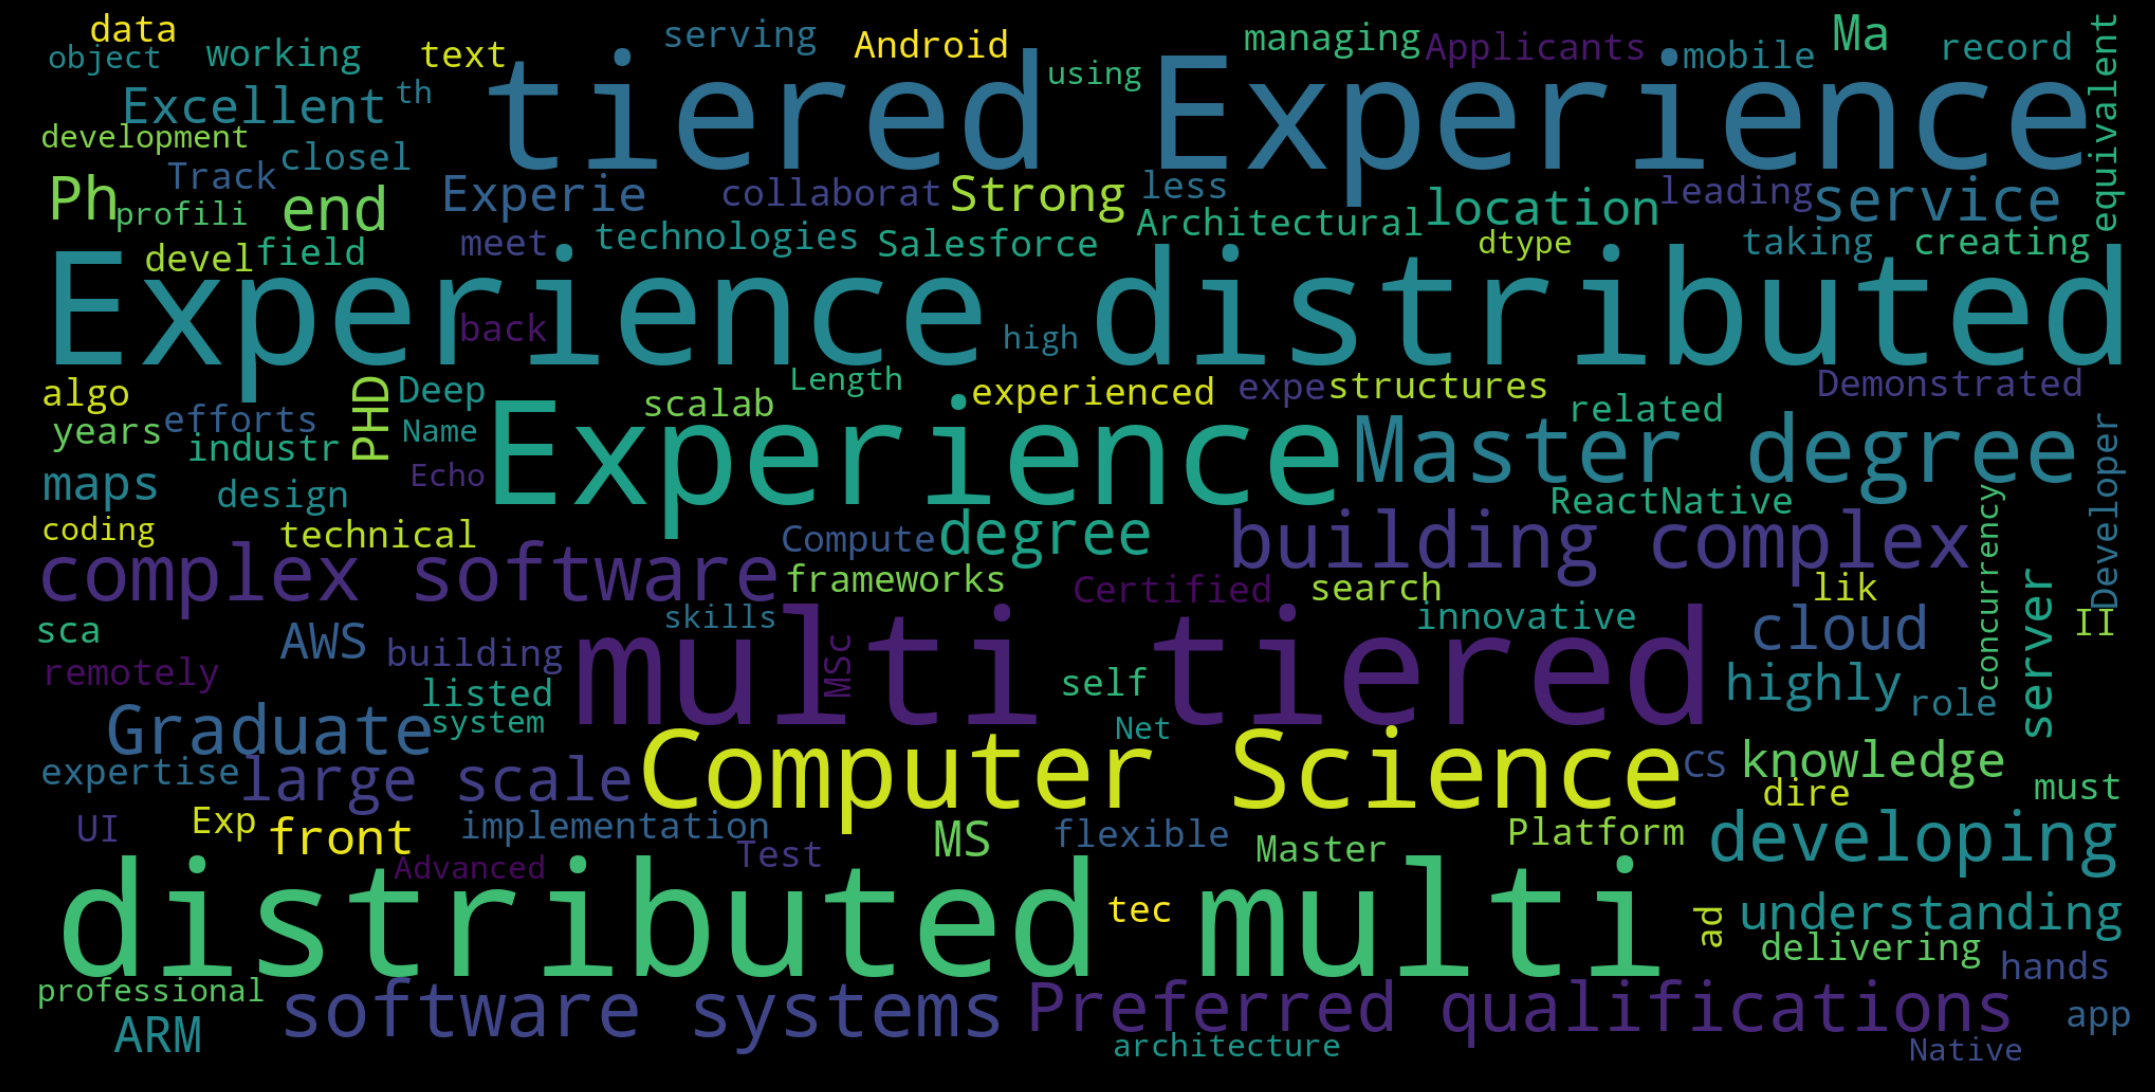

In [127]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(result['PREFERRED QUALIFICATIONS']))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [216]:
entry_level = result[(result['BASIC QUALIFICATIONS'].str.find('non-internship')==-1) 
                     & (result['BASIC QUALIFICATIONS'].str.find('non internship')==-1)]

entry_level = entry_level[(entry_level['Title'].str.find('Sr. ')==-1 )
            & (entry_level['Title'].str.find('Senior')==-1 )
            & (entry_level['Title'].str.find('III')==-1)
            & (entry_level['Title'].str.find('II')==-1)
            & (entry_level['Title'].str.find('Manager')==-1)]

In [217]:
sde = 'Software Development Engineer'
entry_level['cleaned_title'] = entry_level['Title'].apply(lambda x: sde if sde in x or 'SDE' in x else x)

In [247]:
entry_level.shape

(506, 10)

In [250]:
entry_level[entry_level.cleaned_title=='Machine Learning Engineer'].job_link.values[0]

'https://www.amazon.jobs/en-gb/jobs/874284/machine-learning-engineer'

In [198]:
for i, row in entry_level[entry_level['TEAM'].str.find('AI')!=-1].iterrows():
    print(row['Title'])
    print()
    print(row['DESCRIPTION'])
    print("\n\n")

Software Development Engineer - Amazon Robotics - North Reading, MA

Our vision at Amazon Comprehend (https://aws.amazon.com/comprehend) is to simplify Natural Language Processing (NLP), especially, text analysis. We do that by offering capabilities that helps customers find insights and relationships in text using highly available and scalable machine learning. We have just started and there is just so much to do. Are you interested in shaping the future of this field? Come and be part of the Amazon AWS Artificial Intelligence organization!To learn more what we have recently delivered and how customers are using Amazon Comprehend, please refer to various blogs here: https://aws.amazon.com/blogs/machine-learning/category/artificial-intelligence/amazon-comprehend/In this role you will join Amazon Comprehend which is trend setting in NLP and ML field. This is an area that requires solving the hardest engineering challenges in the intersection of machine learning and distributed systems a

In this role you will start out leading a brand new AWS machine learning team which is going to be trend setting in the ML field. This includes the core storage engine, replication, backup and other node services. This is an area that requires solving the hardest engineering challenges in distributed systems at massive scale. As a tier zero Amazon service our solutions have to be super solid, scalable, efficient, and extremely fault tolerant.In the larger scope of the role, you will be responsible for rethinking the assumptions behind how traditional database services were built and thinking how to build database services best suited for the cloud. You will own the design, development, testing and deployment of these database services. You will draw from a deep and broad technical expertise to mentor engineers, complete hands-on technical work and provide leadership on complex technical issues. You will manage and be responsible for delivering some of our most strategic technical proje

Opportunity to lead the Artificial Intelligence team behind the smart, instantly familiar, and universal personal assistant -- Alexa. You will support the team behind understanding and decision-making. The Artificial Intelligence team is looking for exceptional Senior Engineers to be part of a world class team changing the way people develop interact with digital personal assistants anytime and anywhere.You should be somebody who is passionate about customers, and running highly available distributed platform on the Internet. You must enjoy a close-knit team environment of shared responsibility. The ideal candidate will have experience in deep neural networks, and will have developed highly available systems (four nines) over the course of their career.As part of the team you will:· Green-field opportunity to create the artificial intelligence platform behind Alexa!· Design and build systems that scale across millions of active users and devices.· Be in charge of the complete software 

In [221]:
#combining the two dataframes and save them in a csv file
result.to_csv('amazon_sde_june_jobs.csv')

______

In [203]:
seattle_ml_jobs = amazon_job_search(number_page=None,
                                     category_filter="machine-learning-science",
                                     location_filter="Seattle, WA, United States")

Fetching jobs posted on June 25, 2019 : https://www.amazon.jobs/en-gb/search?offset=0&result_limit=10&sort=recent&category=machine-learning-science&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June 18, 2019 : https://www.amazon.jobs/en-gb/search?offset=10&result_limit=10&sort=recent&category=machine-learning-science&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June  6, 2019 : https://www.amazon.jobs/en-gb/search?offset=20&result_limit=10&sort=recent&category=machine-learning-science&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June  3, 2019 : https://www.amazon.jobs/en-gb/search?offset=30&result_limit=10&sort=recent&category=machine-learning-science&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Se

In [205]:
ml_job_list=make_list(seattle_ml_jobs)
ml_df = make_dataframe(ml_job_list)
ml_df.shape

(240, 4)

In [222]:
ml_job_descriptions=[]

ml_job_links = ml_df.job_link.values.tolist()

for job_link in tqdm(ml_job_links):
    try:
        driver_path = "chromedriver"
        chrome_options = Options()
        chrome_options.add_argument("--headless")
        driver=webdriver.Chrome(executable_path=driver_path, 
                                options=chrome_options)
        URL= job_link #job_link[x]
        driver.get(URL)
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        driver.quit()
        print("Fetching job information from", URL)

        required_info = ['DESCRIPTION', 
                         'BASIC QUALIFICATIONS',
                         'PREFERRED QUALIFICATIONS']
        job_info = []
        for h3 in soup.findAll("h3"):
            if h3.text in required_info:
                job_info.append(h3.next_sibling.text)

        team = soup.find('div',
                         {"class":"team-icon"}).find('div', 
                                                     {'class':'association-content'}).text.strip()
        job_info.append(team)
        ml_job_descriptions.append(job_info)
    except Exception as e:
        pass

Fetching job information from https://www.amazon.jobs/en-gb/jobs/885277/applied-scientist-ii-amz3350
Fetching job information from https://www.amazon.jobs/en-gb/jobs/883986/applied-scientist-computer-vision
Fetching job information from https://www.amazon.jobs/en-gb/jobs/883715/senior-practice-manager-data-science
Fetching job information from https://www.amazon.jobs/en-gb/jobs/883577/applied-scientist
Fetching job information from https://www.amazon.jobs/en-gb/jobs/882352/applied-science-manager
Fetching job information from https://www.amazon.jobs/en-gb/jobs/882293/principal-applied-scientist-machine-learning
Fetching job information from https://www.amazon.jobs/en-gb/jobs/881649/machine-learning-scientist
Fetching job information from https://www.amazon.jobs/en-gb/jobs/881623/senior-applied-scientist
Fetching job information from https://www.amazon.jobs/en-gb/jobs/881143/applied-scientist
Fetching job information from https://www.amazon.jobs/en-gb/jobs/879827/applied-scientist-sspa


Fetching job information from https://www.amazon.jobs/en-gb/jobs/813263/applied-scientist-nlp
Fetching job information from https://www.amazon.jobs/en-gb/jobs/813250/machine-learning-scientist
Fetching job information from https://www.amazon.jobs/en-gb/jobs/813118/machine-learning-scientist-global-talent-management
Fetching job information from https://www.amazon.jobs/en-gb/jobs/810594/applied-scientist
Fetching job information from https://www.amazon.jobs/en-gb/jobs/810296/principal-applied-scientist-alexa-ai
Fetching job information from https://www.amazon.jobs/en-gb/jobs/809564/applied-scientist
Fetching job information from https://www.amazon.jobs/en-gb/jobs/809450/sr-applied-scientist-alexa-engine
Fetching job information from https://www.amazon.jobs/en-gb/jobs/809231/applied-scientist-international-technology
Fetching job information from https://www.amazon.jobs/en-gb/jobs/809212/data-scientist
Fetching job information from https://www.amazon.jobs/en-gb/jobs/809211/data-scientist

In [227]:
#create a dataframe from the job description, basic qualification and preferred qualification
ml_job_descriptions_df = pd.DataFrame(ml_job_descriptions,
                                      columns=['DESCRIPTION','BASIC QUALIFICATIONS','PREFERRED QUALIFICATIONS', 'TEAM'])

In [228]:
ml_job_descriptions_df.head()

,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS,TEAM
0,MULTIPLE POSITIONS AVAILABLEEntity: Amazon.com...,Position Requirements:Ph.D. or foreign equival...,Applicants must meet all of the above listed r...,Amazon Live
1,Amazon Web Services (AWS) Professional Service...,• A Bachelor or Masters Degree in a highly qua...,• PhD in a highly quantitative field (Computer...,Professional Services
2,Do you want to join an innovative team of scie...,"· A MS in CS machine learning, Statistics, Ope...","· A PhD in CS, machine learning, Statistics, O...",Transaction Risk Management Systems
3,Alexa is the cloud-based intelligent agent tha...,"· Graduate degree in engineering, computer sci...",· PhD· Project management experience desired f...,Alexa AI
4,Have you ever ordered a product on Amazon and ...,"· Ph.D. in Machine Learning, Statistics, Appli...",· Deep knowledge of probabilistic machine lear...,Supply Chain Optimization Technologies


In [230]:
ml_df.head()

,Title,location,Posting_date,job_link
0,Applied Scientist II - AMZ3350,"US, CA, Sunnyvale","June 25, 2019",https://www.amazon.jobs/en-gb/jobs/885277/appl...
1,"Applied Scientist, Computer Vision","UK, London","June 24, 2019",https://www.amazon.jobs/en-gb/jobs/883986/appl...
2,"Senior Practice Manager, Data Science","US, NY, New York","June 24, 2019",https://www.amazon.jobs/en-gb/jobs/883715/seni...
3,Applied Scientist,"US, WA, Seattle","June 24, 2019",https://www.amazon.jobs/en-gb/jobs/883577/appl...
4,Applied Science Manager,"US, MA, Cambridge","June 21, 2019",https://www.amazon.jobs/en-gb/jobs/882352/appl...


In [231]:
ml_job_descriptions_df.shape, ml_df.shape

((211, 4), (240, 4))

In [232]:
ml_result = pd.concat([ml_df[['Title','location','Posting_date', 'job_link']],
                       ml_job_descriptions_df[['DESCRIPTION','BASIC QUALIFICATIONS','PREFERRED QUALIFICATIONS','TEAM']]],
                      axis=1, join='inner')

In [233]:
ml_result.to_csv('amazon_ml_jobs.csv')

In [223]:
seattle_ds_jobs = amazon_job_search(number_page=None,
                                     category_filter="data-science",
                                     location_filter="Seattle, WA, United States")

Fetching jobs posted on June 26, 2019 : https://www.amazon.jobs/en-gb/search?offset=0&result_limit=10&sort=recent&category=data-science&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June 18, 2019 : https://www.amazon.jobs/en-gb/search?offset=10&result_limit=10&sort=recent&category=data-science&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June  5, 2019 : https://www.amazon.jobs/en-gb/search?offset=20&result_limit=10&sort=recent&category=data-science&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs posted on June  4, 2019 : https://www.amazon.jobs/en-gb/search?offset=30&result_limit=10&sort=recent&category=data-science&distanceType=Mi&radius=24km&latitude=&longitude=&loc_group_id=&loc_query=Seattle%2C%20WA%2C%20United%20States
Fetching jobs

In [224]:
ds_job_list=make_list(seattle_ds_jobs)
ds_df = make_dataframe(ds_job_list)
ds_df.shape

(180, 4)

In [226]:
ds_job_descriptions=[]

ds_job_links = ds_df.job_link.values.tolist()

for job_link in tqdm(ds_job_links):
    try:
        driver_path = "chromedriver"
        chrome_options = Options()
        chrome_options.add_argument("--headless")
        driver=webdriver.Chrome(executable_path=driver_path, 
                                options=chrome_options)
        URL= job_link #job_link[x]
        driver.get(URL)
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        driver.quit()
        print("Fetching job information from", URL)

        required_info = ['DESCRIPTION', 
                         'BASIC QUALIFICATIONS',
                         'PREFERRED QUALIFICATIONS']
        job_info = []
        for h3 in soup.findAll("h3"):
            if h3.text in required_info:
                job_info.append(h3.next_sibling.text)

        team = soup.find('div',
                         {"class":"team-icon"}).find('div', 
                                                     {'class':'association-content'}).text.strip()
        job_info.append(team)
        ds_job_descriptions.append(job_info)
    except Exception as e:
        pass

Fetching job information from https://www.amazon.jobs/en-gb/jobs/885692/data-scientist-ii-amz3654
Fetching job information from https://www.amazon.jobs/en-gb/jobs/885447/business-intelligence-manager
Fetching job information from https://www.amazon.jobs/en-gb/jobs/882398/data-scientist-ii-imdb-tv
Fetching job information from https://www.amazon.jobs/en-gb/jobs/882315/data-scientist-ii-amz3356
Fetching job information from https://www.amazon.jobs/en-gb/jobs/882260/data-scientist
Fetching job information from https://www.amazon.jobs/en-gb/jobs/881795/sr-language-engineer-amazon-music
Fetching job information from https://www.amazon.jobs/en-gb/jobs/881714/data-scientist-sponsored-products-marketplace
Fetching job information from https://www.amazon.jobs/en-gb/jobs/881405/data-scientist-private-brands
Fetching job information from https://www.amazon.jobs/en-gb/jobs/881397/data-engineer-ii-amz3321
Fetching job information from https://www.amazon.jobs/en-gb/jobs/880560/data-science-manager
F

Fetching job information from https://www.amazon.jobs/en-gb/jobs/844700/senior-digital-marketing-analyst
Fetching job information from https://www.amazon.jobs/en-gb/jobs/844676/data-scientist-eu-packaging
Fetching job information from https://www.amazon.jobs/en-gb/jobs/844445/principal-data-scientist
Fetching job information from https://www.amazon.jobs/en-gb/jobs/844353/program-manager-analytics
Fetching job information from https://www.amazon.jobs/en-gb/jobs/843926/data-scientist-nlu-analytics
Fetching job information from https://www.amazon.jobs/en-gb/jobs/843805/data-scientist-advertising-measurement-and-optimization
Fetching job information from https://www.amazon.jobs/en-gb/jobs/842043/data-scientist
Fetching job information from https://www.amazon.jobs/en-gb/jobs/841691/language-engineer-amazon-music-nlu
Fetching job information from https://www.amazon.jobs/en-gb/jobs/841439/data-scientist-ii
Fetching job information from https://www.amazon.jobs/en-gb/jobs/841054/applied-science

In [235]:
ds_job_descriptions_df = pd.DataFrame(ds_job_descriptions,
                                      columns=['DESCRIPTION','BASIC QUALIFICATIONS','PREFERRED QUALIFICATIONS', 'TEAM'])

In [236]:
ds_job_descriptions_df.head()

,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS,TEAM
0,MULTIPLE POSITIONS AVAILABLECompany: Amazon.co...,Position Requirements:Master’s degree or forei...,Please see the job description and position re...,Multichannel Advertising
1,Hey – there’s a revolution going on! A revolut...,· Passion for data (and fearlessness in the fa...,· Domain knowledge of comparable products (dig...,Audible
2,The IMDb TV team is shaping the future of digi...,"· Master’s degree in math, economics, engineer...","· Ph.D. in Statistics, Applied Mathematics or ...",IMDb TV
3,Interested in building systems that allow Alex...,· Bachelor’s degree in a relevant field· 5+ ye...,"· Deep expertise in building ontologies, taxon...",Amazon Music
4,Amazon.com seeks an exceptional Data Scientist...,· BS with 5 years of relevant experience or MS...,· Experience with AWS tools· Experience with o...,Self-Service Performance Advertising


In [234]:
ds_df.head()

,Title,location,Posting_date,job_link
0,Data Scientist II - AMZ3654,"US, WA, Seattle","June 26, 2019",https://www.amazon.jobs/en-gb/jobs/885692/data...
1,Business Intelligence Manager,"US, NJ, Newark","June 26, 2019",https://www.amazon.jobs/en-gb/jobs/885447/busi...
2,"Data Scientist II, IMDb TV","US, WA, Seattle","June 21, 2019",https://www.amazon.jobs/en-gb/jobs/882398/data...
3,Data Scientist II - AMZ3356,"US, NJ, Newark","June 21, 2019",https://www.amazon.jobs/en-gb/jobs/882315/data...
4,Data Scientist,"US, WA, Bellevue","June 21, 2019",https://www.amazon.jobs/en-gb/jobs/882260/data...


In [237]:
ds_df.shape, ds_job_descriptions_df.shape

((180, 4), (133, 4))

In [238]:
ds_result = pd.concat([ds_df[['Title','location','Posting_date', 'job_link']],
                       ds_job_descriptions_df[['DESCRIPTION','BASIC QUALIFICATIONS','PREFERRED QUALIFICATIONS','TEAM']]],
                      axis=1, join='inner')

In [239]:
result.shape, ml_result.shape, ds_result.shape

((911, 9), (211, 8), (133, 8))

In [240]:
ds_result.to_csv('amazon_ds_jobs.csv')

________

In [453]:
def filter_jobs(df):
    df.DESCRIPTION = df.DESCRIPTION.apply(lambda s: s.encode('ascii', 'ignore').decode('ascii'))
    df['BASIC QUALIFICATIONS'] = df['BASIC QUALIFICATIONS'].apply(lambda s: s.encode('ascii', 'ignore').decode('ascii'))
    df['PREFERRED QUALIFICATIONS'] = df['PREFERRED QUALIFICATIONS'].apply(lambda s: s.encode('ascii', 'ignore').decode('ascii'))
    
    entry_level_df = df[df['BASIC QUALIFICATIONS'].str.find('non-internship')==-1]
    entry_level_df = entry_level_df[entry_level_df['BASIC QUALIFICATIONS'].str.find('non internship')==-1]
    print(entry_level_df.shape)
    entry_level_df = entry_level_df[entry_level_df['Title'].str.find('Sr')==-1]
    entry_level_df = entry_level_df[entry_level_df['Title'].str.find('Senior')==-1]
    entry_level_df = entry_level_df[entry_level_df['Title'].str.find('III')==-1]
    entry_level_df = entry_level_df[entry_level_df['Title'].str.find('II')==-1]
    entry_level_df = entry_level_df[entry_level_df['Title'].str.find('Manager')==-1]
    print(entry_level_df.shape)
    return entry_level_df

## SDE

In [454]:
filter_jobs(result).shape, result.shape

(728, 9)
(501, 9)


((501, 9), (911, 9))

In [455]:
entry_level_sde = filter_jobs(result)
entry_level_sde.shape

(728, 9)
(501, 9)


(501, 9)

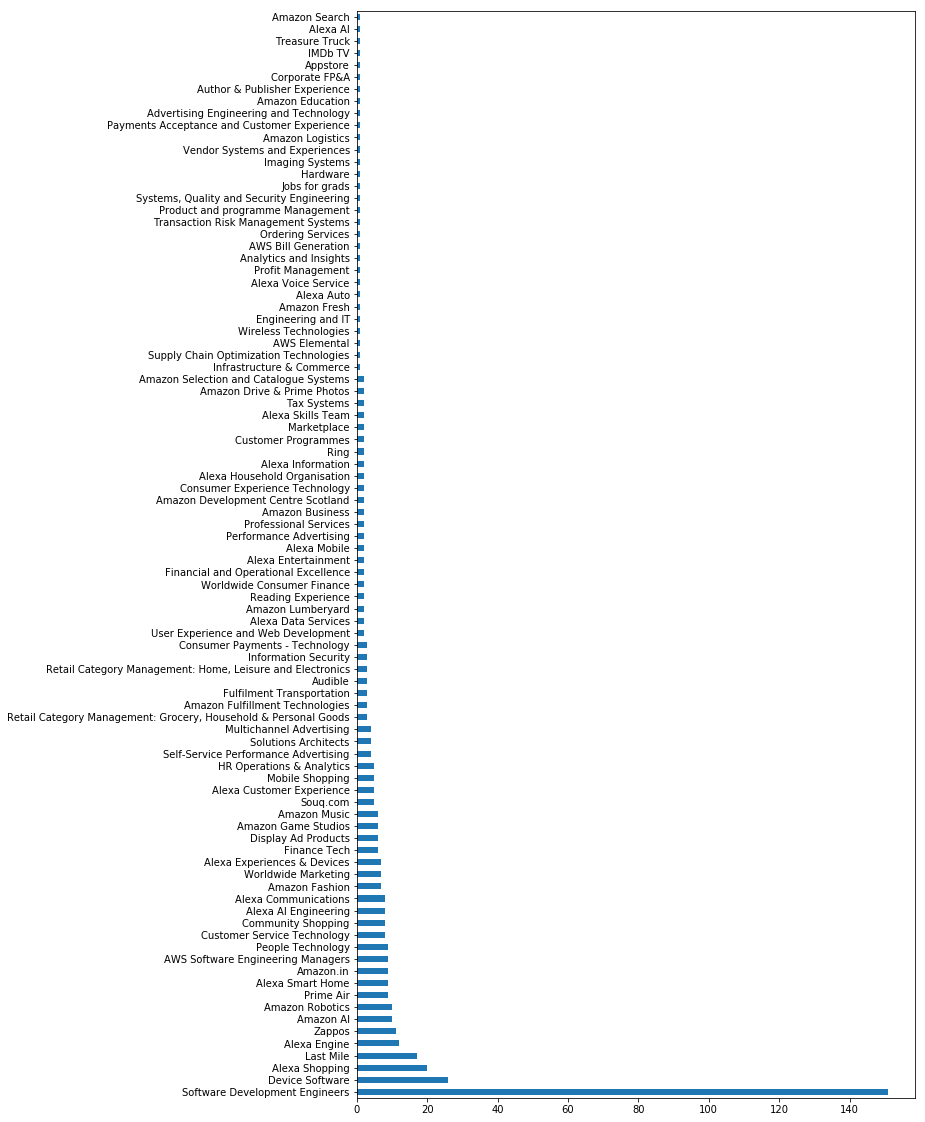

In [274]:
entry_level_sde_june = entry_level_sde[entry_level_sde['Posting_date'].str[:4]=='June']
sde = 'Software Development Engineer'
entry_level_sde['cleaned_title'] = entry_level_sde['Title'].apply(lambda x: sde if sde in x or 'SDE' in x else x)
plt.figure(figsize=(10,20))
entry_level_sde['TEAM'].value_counts().plot('barh')

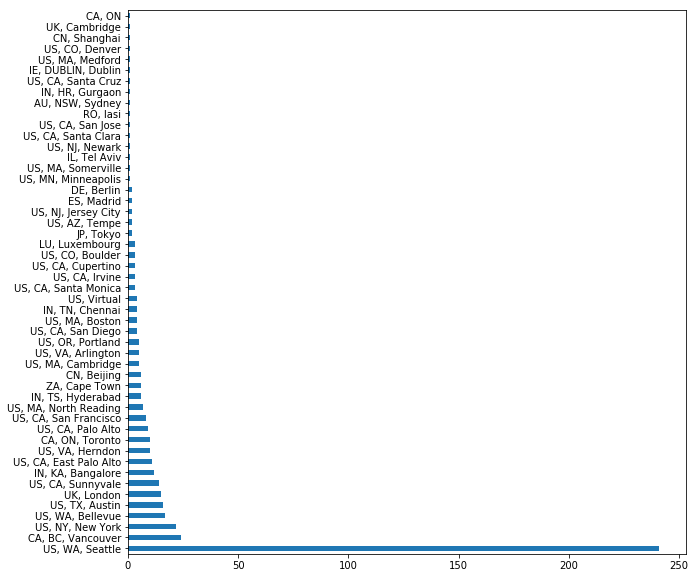

In [275]:
plt.figure(figsize=(10,10))
entry_level_sde['location'].value_counts().plot('barh')

In [333]:
entry_level.TEAM.unique().tolist()

['Amazon Fashion',
 'Software Development Engineers',
 'Prime Air',
 'Amazon Fulfillment Technologies',
 'Jobs for grads',
 'Alexa Household Organisation',
 'Worldwide Marketing',
 'Last Mile',
 'Alexa Engine',
 'Community Shopping',
 'Worldwide Consumer Finance',
 'Amazon Robotics',
 'Amazon AI',
 'Amazon.in',
 'Amazon Game Studios',
 'Reading Experience',
 'Display Ad Products',
 'Alexa Skills Team',
 'Alexa Shopping',
 'Engineering and IT',
 'Amazon Music',
 'Multichannel Advertising',
 'Alexa Experiences & Devices',
 'Author & Publisher Experience',
 'Device Software',
 'Professional Services',
 'Customer Service Technology',
 'People Technology',
 'Amazon Development Centre Scotland',
 'Finance Tech',
 'Treasure Truck',
 'Imaging Systems',
 'Retail Category Management: Home, Leisure and Electronics',
 'User Experience and Web Development',
 'Mobile Shopping',
 'Corporate FP&A',
 'Ordering Services',
 'Alexa AI Engineering',
 'Souq.com',
 'AWS Software Engineering Managers',
 'Cust

In [334]:
ca_locations = [loc for loc in entry_level.location.unique().tolist() if 'US, CA' in loc]
seattle_location = 'US, WA, Seattle'
ny_location = 'US, NY, New York'
include_locations = ca_locations + [seattle_location] + [ny_location]

In [335]:
include_teams  = [
    'Software Development Engineers',
    'Prime Air',
    'Jobs for grads',
    'Alexa Household Organisation'
    'Amazon Robotics',
    'Amazon AI',
    'Amazon Game Studios',
    'Imaging Systems',
    'Alexa AI Engineering',
    'Alexa Data Services',
    'Amazon Search',
    'IMDb TV',
    'Amazon Drive & Prime Photos',
    'Alexa AI',
    'Alexa Information',
]

In [336]:
entry_level_sde_filtered = entry_level_sde[entry_level_sde.location.isin(include_locations) & entry_level_sde.TEAM.isin(include_teams)]

In [338]:
entry_level_sde_filtered.shape

(115, 10)

In [352]:
sde_job_links = entry_level_sde_filtered.job_link.values.tolist()
print(sde_job_links[0])

https://www.amazon.jobs/en-gb/jobs/884758/sdet


In [353]:
n = 20
sde_job_batches = [sde_job_links[i*n :(i+1)*n] for i in range((len(sde_job_links)+n-1) // n )] 

In [425]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

drivers = {}
for batch, sde_job_links_batch in enumerate(sde_job_batches):
    drivers[batch] = webdriver.Chrome()
    drivers[batch].get(sde_job_links_batch[0])
    i = 2
    for url in sde_job_links_batch[1:]:
        drivers[batch].execute_script("window.open('about:blank', 'tab{0}');".format(i))
        drivers[batch].switch_to.window("tab{0}".format(i))
        drivers[batch].get(url)
        i=i+1

# ML

In [456]:
ml_result.shape

(211, 8)

In [457]:
entry_level_ml = filter_jobs(ml_result)
entry_level_ml.shape

(211, 8)
(137, 8)


(137, 8)

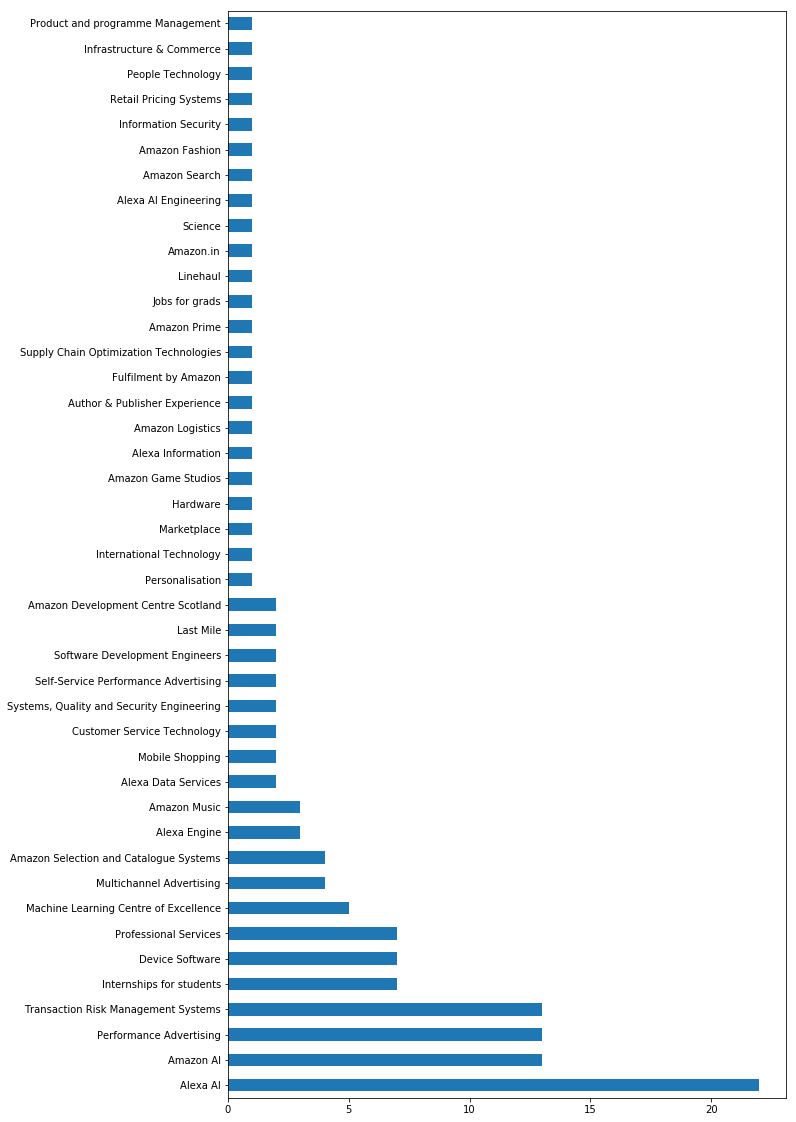

In [435]:
plt.figure(figsize=(10,20))
entry_level_ml['TEAM'].value_counts().plot('barh')

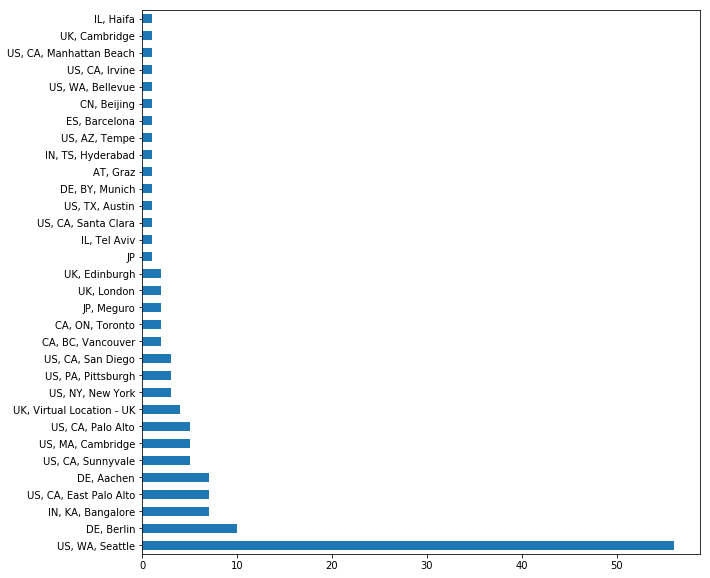

In [436]:
plt.figure(figsize=(10,10))
entry_level_ml['location'].value_counts().plot('barh')

In [447]:
n = 20
ml_job_batches = [ml_job_links[i*n :(i+1)*n] for i in range((len(entry_level_ml.job_link.values)+n-1) // n )] 

In [449]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

drivers = {}
for batch, ml_job_links_batch in enumerate(ml_job_batches):
    drivers[batch] = webdriver.Chrome()
    drivers[batch].get(ml_job_links_batch[0])
    i = 2
    for url in ml_job_links_batch[1:]:
        drivers[batch].execute_script("window.open('about:blank', 'tab{0}');".format(i))
        drivers[batch].switch_to.window("tab{0}".format(i))
        drivers[batch].get(url)
        i=i+1

# DS

In [458]:
ds_result.shape

(133, 8)

In [459]:
entry_level_ds = filter_jobs(ds_result)
entry_level_ds.shape

(133, 8)
(84, 8)


(84, 8)

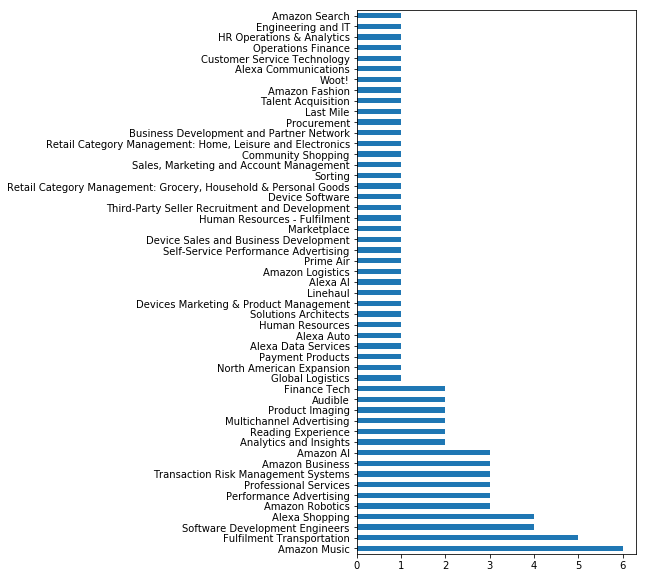

In [462]:
plt.figure(figsize=(5,10))
entry_level_ds['TEAM'].value_counts().plot('barh')

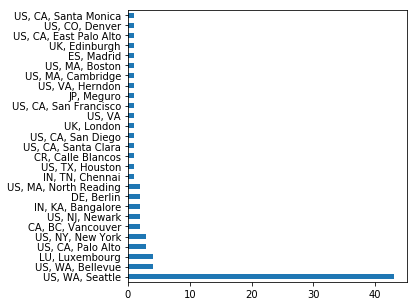

In [465]:
plt.figure(figsize=(5,5))
entry_level_ds['location'].value_counts().plot('barh')

In [466]:
n = 20
ds_job_batches = [ds_job_links[i*n :(i+1)*n] for i in range((len(entry_level_ds.job_link.values)+n-1) // n )] 

In [467]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

drivers = {}
for batch, ds_job_links_batch in enumerate(ds_job_batches):
    drivers[batch] = webdriver.Chrome()
    drivers[batch].get(ds_job_links_batch[0])
    i = 2
    for url in ds_job_links_batch[1:]:
        drivers[batch].execute_script("window.open('about:blank', 'tab{0}');".format(i))
        drivers[batch].switch_to.window("tab{0}".format(i))
        drivers[batch].get(url)
        i=i+1